# Welcome to the Fashion-MNIST Challenge!

Website reference: https://github.com/zalandoresearch/fashion-mnist

In [6]:
##################################################
# Imports
##################################################

import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

##################################################
# Custom imports
##################################################

import tensorflow as tf
# from keras.callbacks import ReduceLROnPlateau
from sklearn import preprocessing
import datetime

##################################################
# Params
##################################################

DATA_BASE_FOLDER = './image-classification-fashion-mnist'

# Dataset

The dataset contains 50k train + 10k validation images of 10 different categories ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot').

Each image is a 28x28 grayscale, and for simplicity here is flattened into a 784 dimensional vector.

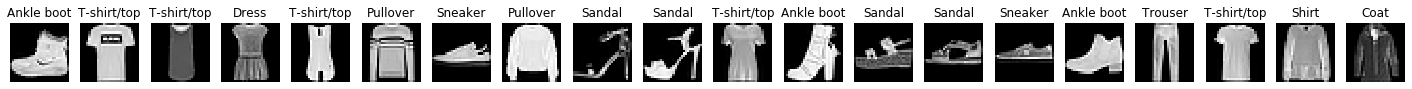

In [7]:
##################################################
# Load dataset
##################################################

x_train = np.load(os.path.join(DATA_BASE_FOLDER, 'train.npy'))
x_valid = np.load(os.path.join(DATA_BASE_FOLDER, 'validation.npy'))
x_test = np.load(os.path.join(DATA_BASE_FOLDER, 'test.npy'))
y_train = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'train.csv'))['class'].values
y_valid = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'validation.csv'))['class'].values
y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot random images of different classes
plt.figure(figsize=(25, 5))
for idx in range(20):
    plt.subplot(1, 20, idx + 1)
    img = x_train[idx].reshape(28, 28)
    plt.title(f'{y_labels[y_train[idx]]}')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

# Normalization
Here we normalize the data in order to eliminate small differences between inputs.

In [8]:
##################################################
# Normalization of the input data
##################################################

x_train = preprocessing.normalize(x_train)
x_valid = preprocessing.normalize(x_valid)
x_test = preprocessing.normalize(x_test)

# Reshaping
Here we reshape the data in order to feed it to the algorithm in the correct format.

In [9]:
##################################################
# Process the data here, if needed
##################################################

print("### Initial shape ###")
print("x_train",x_train.shape)
print("x_valid",x_valid.shape)
print("x_test",x_test.shape)

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_valid = x_valid.reshape(x_valid.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print("### Final shape ###")
print("x_train",x_train.shape)
print("x_valid",x_valid.shape)
print("x_test",x_test.shape)

### Initial shape ###
x_train (50000, 784)
x_valid (10000, 784)
x_test (10000, 784)
### Final shape ###
x_train (50000, 28, 28, 1)
x_valid (10000, 28, 28, 1)
x_test (10000, 28, 28, 1)


# Model

Here you have to implement a model (or more models, for finding the most accurate) for classification.

You can use the [`sklearn`](https://scikit-learn.org/stable/) (or optionally other more advanced frameworks such as [`pytorch`](https://pytorch.org/) or [`tensorflow`](https://www.tensorflow.org/)) package that contains a pool of models already implemented that perform classification. (SVMs, NNs, LR, kNN, ...)

# Best model (CNN)
This is the best CNN model we could build with only 2 layers: one **convolutional** layer and one **dense** (_fully connected_) layer.

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)

history = model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid),verbose=1,callbacks=[reduce_lr])

Epoch 1/20
 228/1563 [===>..........................] - ETA: 1:18 - loss: 0.5677 - accuracy: 0.7950

KeyboardInterrupt: 

# Very heavy CNN (do not start this unless you have 2 hours to waste)

In [ ]:
# Model
model = tf.keras.models.Sequential([
    # Add convolution 2D
tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(28, 28, 1)),
tf.keras.layers.Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu',padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(28, 28, 1)),
tf.keras.layers.Conv2D(128, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(28, 28, 1)),
tf.keras.layers.Conv2D(256, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'),
tf.keras.layers.Conv2D(256, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(0.3),

#model.add(Conv2D(128, (3, 3), activation='relu'))
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)

history = model.fit(x_train,y_train,epochs=100,validation_data=(x_valid,y_valid),verbose=1,callbacks=[reduce_lr])

# Plot accuracy and loss
Here we compare the accuracy and the loss over the epochs for both **training data** and **validation data**.

[Text(0, 0.5, 'lr'), Text(0.5, 0, 'epoch')]

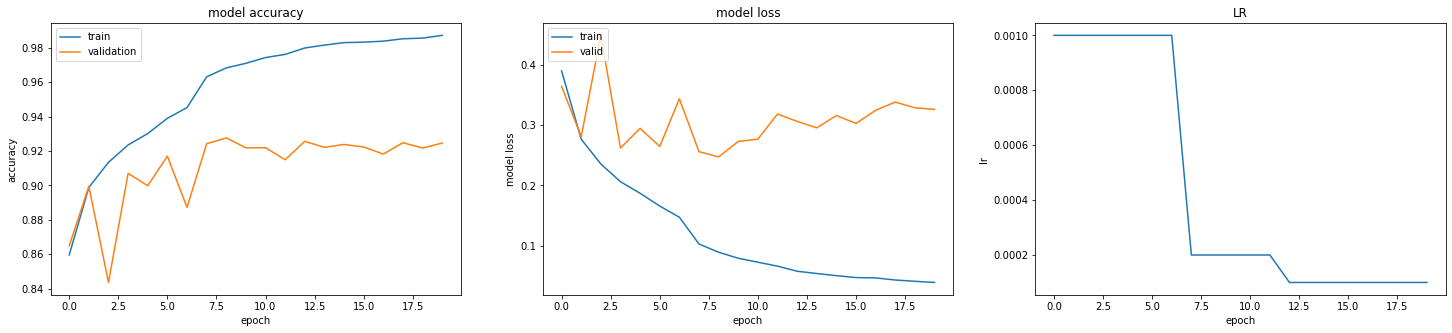

In [43]:
##################################################
# Plot
##################################################

fig, (p1,p2,p3) = plt.subplots(1, 3,figsize=(25,5))
p1.plot(history.history['accuracy'])
p1.plot(history.history['val_accuracy'])
p1.set_title("model accuracy")
p1.set(xlabel='epoch',ylabel="accuracy")
p1.legend(['train', 'validation'], loc='upper left')

p2.plot(history.history['loss'])
p2.plot(history.history['val_loss'])
p2.set_title("model loss")
p2.set(xlabel='epoch',ylabel="model loss")
p2.legend(['train', 'valid'], loc='upper left')

p3.plot(history.history['lr'])
p3.set_title('LR')
p3.set(xlabel="epoch",ylabel='lr')

# KNN model test

In [ ]:
from sklearn import neighbors
start = datetime.datetime.now()
print("fitting")
clf = neighbors.KNeighborsClassifier()
print(clf)
clf.fit(x_train,y_train)
print("evaluating")
accuracy = clf.score(x_valid[:100],y_valid[:100])
print("accuracy", accuracy)
end = datetime.datetime.now()
difference = end-start
print(difference.seconds)

# SVM model test

In [ ]:
from sklearn import svm
start = datetime.datetime.now()
clf = svm.SVC(kernel="poly",degree=6)
print(clf)
print("# training")
# clf.fit(x_train[:10000],y_train[:10000])
clf.fit(x_train,y_train)
training_difference = datetime.datetime.now()-start
print("trained in ",training_difference.seconds,"seconds")
print("# evaluating")
accuracy = clf.score(x_valid,y_valid)
print("accuracy", accuracy)
test_difference = datetime.datetime.now()-start-training_difference
print("tested in",test_difference.seconds,"seconds")
difference = datetime.datetime.now()-start
print("total time",difference.seconds,"seconds")

# Random forest model test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
start = datetime.datetime.now()
clf = RandomForestClassifier()
# clf = RandomForestClassifier(max_depth=2, random_state=0)
print(clf)
print("# training")
# clf.fit(x_train[:100],y_train[:100])
# clf.fit(x_train[:1000],y_train[:1000])
# clf.fit(x_train[:10000],y_train[:10000])
clf.fit(x_train,y_train)
training_difference = datetime.datetime.now()-start
print("trained in ",training_difference.seconds,"seconds")
print("# evaluating")
# accuracy = clf.score(x_valid[:100],y_valid[:100])
# accuracy = clf.score(x_valid[:1000],y_valid[:1000])
accuracy = clf.score(x_valid,y_valid)
print("accuracy", accuracy)
test_difference = datetime.datetime.now()-start-training_difference
print("tested in",test_difference.seconds,"seconds")
difference = datetime.datetime.now()-start
print("total time",difference.seconds,"seconds")

# Logistic regression model test

In [ ]:
from sklearn.linear_model import LogisticRegression
start = datetime.datetime.now()
clf = LogisticRegression(random_state=0, max_iter = 10000)
print(clf)
print("# training")
# clf.fit(x_train[:100],y_train[:100])
# clf.fit(x_train[:1000],y_train[:1000])
# clf.fit(x_train[:10000],y_train[:10000])
clf.fit(x_train,y_train)
training_difference = datetime.datetime.now()-start
print("trained in ",training_difference.seconds,"seconds")
print("# evaluating")
# accuracy = clf.score(x_valid[:100],y_valid[:100])
# accuracy = clf.score(x_valid[:1000],y_valid[:1000])
accuracy = clf.score(x_valid,y_valid)
print("accuracy", accuracy)
test_difference = datetime.datetime.now()-start-training_difference
print("tested in",test_difference.seconds,"seconds")
difference = datetime.datetime.now()-start
print("total time",difference.seconds,"seconds")

# Evaluation

In [44]:
##################################################
# Evaluate the model here
##################################################

# Use this function to evaluate your model
def accuracy(y_pred, y_true):
    '''
    input y_pred: ndarray of shape (N,)
    input y_true: ndarray of shape (N,)
    '''
    return (1.0 * (y_pred == y_true)).mean()

# Report the accuracy in the train and validation sets.

train_predict = model.predict_classes(x_train)
valid_predict = model.predict_classes(x_valid)

train_acc = accuracy(train_predict,y_train)
valid_acc = accuracy(valid_predict,y_valid)
print("train accurancy: ",train_acc)
print("valid accurancy: ",valid_acc)

train accurancy:  0.99204
valid accurancy:  0.9246


# Send the submission for the challenge

In [ ]:
##################################################
# Save your test prediction in y_test_pred
##################################################

y_test_pred = model.predict_classes(x_test)

# Create submission
submission = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'sample_submission.csv'))
if y_test_pred is not None:
    submission['class'] = y_test_pred
submission.to_csv('my_submission.csv', index=False)